In [ ]:
#must install mglearn

# KMeans

In [ ]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
import numpy as np

n_clusters  =3

# Generate synthetic data 
X, _ = make_blobs(random_state=1) 
# Build clustering model 
kmeans = KMeans(n_clusters=n_clusters) 
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print("Cluster memberships: {}".format(kmeans.labels_)) 
print("kmeans.labels_.shape:", kmeans.labels_.shape) 
print("X.shape", X.shape) 
print("kmeans.cluster_centers_: ", kmeans.cluster_centers_)

Cluster memberships: [0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]
kmeans.labels_.shape: (100,)
X.shape (100, 2)
kmeans.cluster_centers_:  [[ -1.4710815    4.33721882]
 [-10.04935243  -3.85954095]
 [ -6.58196786  -8.17239339]]


In [ ]:
nassig=kmeans.predict(X) 
print(nassig) 
print(nassig.shape) 
print(X.shape) 
#print(X)


[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]
(100,)
(100, 2)


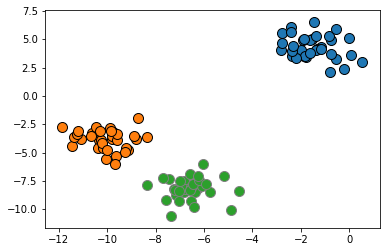

In [ ]:
import mglearn 
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')

se debe conocer bien el dataset y saber cuantos grupos se requerien encontrar

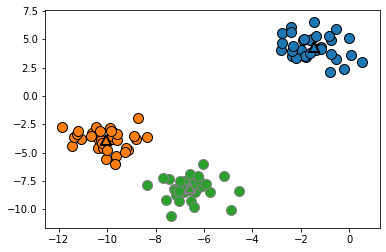

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], np.asarray(range(n_clusters)).T, markers='^', markeredgewidth=2)



---

# Agglomerative clustering

In [ ]:
# Aglomerative clustering: 
from sklearn.cluster import AgglomerativeClustering 
agg = AgglomerativeClustering(n_clusters=3) 
assignment = agg.fit_predict(X) 
print(assignment)

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


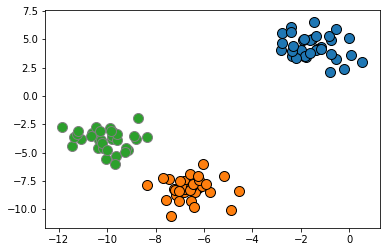

In [ ]:

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment, markers='o')

Text(0, 0.5, 'Feature 1')

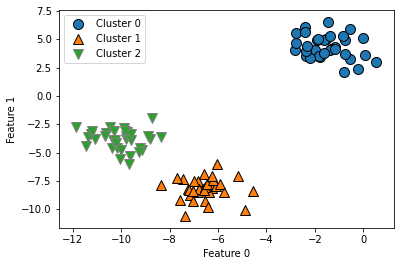

In [ ]:
import matplotlib.pyplot as plt 
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment) 
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best") 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")

## dendrograma

Text(0, 0.5, 'Cluster distance')

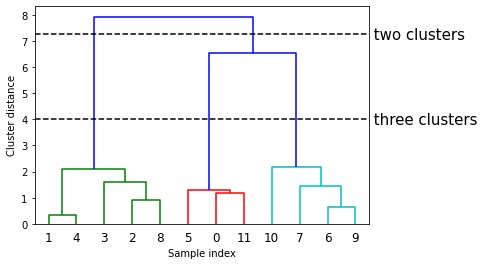

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward 
X, y = make_blobs(random_state=0, n_samples=12) 
# Apply the ward clustering to the data array X 
# The SciPy ward function returns an array that specifies the distances 
# bridged when performing agglomerative clustering 
linkage_array = ward(X) 
# Now we plot the dendrogram for the linkage_array containing the distances 
# between clusters 
dendrogram(linkage_array) 
# mark the cuts in the tree that signify two or three clusters 
ax = plt.gca() 
bounds = ax.get_xbound() 
ax.plot(bounds, [7.25, 7.25], '--', c='k') 
ax.plot(bounds, [4, 4], '--', c='k') 
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15}) 
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15}) 
plt.xlabel("Sample index") 
plt.ylabel("Cluster distance")



---


# DBSCAN

Cluster memberships:
[ 0 10  1  1 -1  2  2 -1  3  2  4  5  3  1  7  3  3  5  3  6  1  0  1  1
  3  0  0  5 -1  5  3  3  3  3  7  5 -1  5  1  1 -1 -1  7  6  5 -1  3 -1
  3  1  5  7  1  5  0  3  5  4  9  1  8  5  3  3  1  5  1  5 -1 -1  5  5
  0 -1  5  1  1 -1  3  1  5  5 10  1 -1  4  0  3  8 -1  6  1  5 -1  5 -1
  3  8  5  5  5  0 -1  5  5  1  3  1  1  7  3  1  5  3  1 -1  1  1  3  3
  1  0  1  9  5  5  3  5 -1  3  3  3  5  3  3 -1 10  3  5  3  1  1 -1  0
  9  3  8 -1  6 -1]


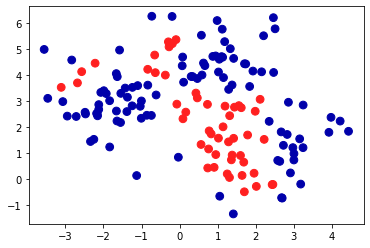

In [ ]:
from sklearn.cluster import DBSCAN 

X, y = make_blobs(random_state=0, n_samples=150) 

dbscan = DBSCAN(eps=0.5, min_samples = 3)
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))
plt.scatter(X[:, 0], X[:, 1], c=clusters,cmap=mglearn.cm2, s= 60)

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


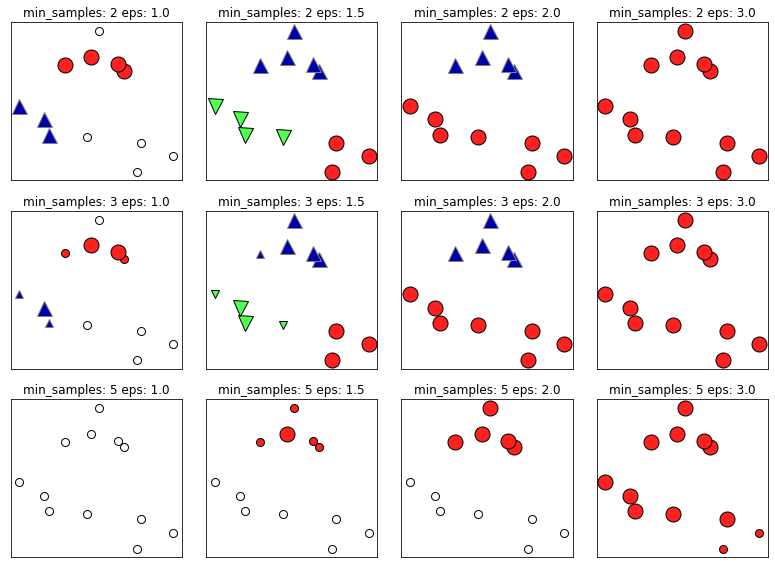

In [ ]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'Feature 1')

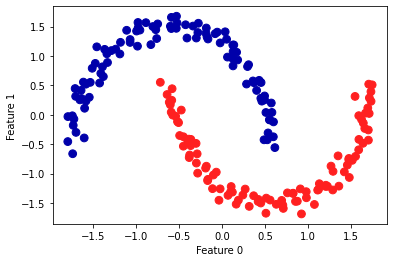

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0) 
# Rescale the data to zero mean and unit variance 
scaler = StandardScaler() 
scaler.fit(X) 
X_scaled = scaler.transform(X) 
dbscan = DBSCAN() 
clusters = dbscan.fit_predict(X_scaled) 
# plot the cluster assignments 
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")